170498071/170498071 [==============================] - 2s 0us/step


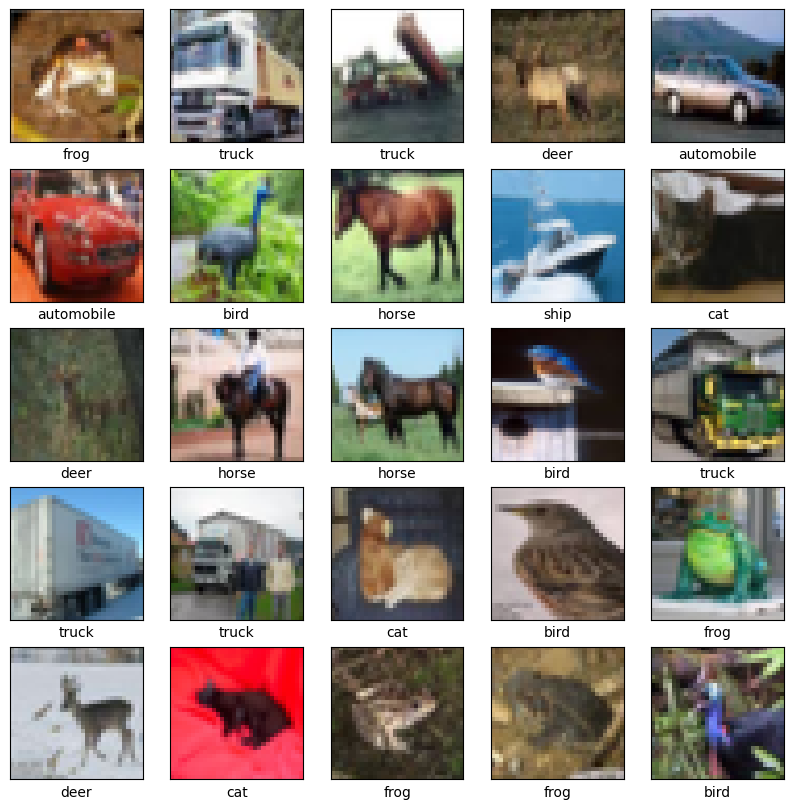

In [ ]:
import tensorflow as ts
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import numpy as np
import os

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./CIFAR10MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               mode='min', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(train_images, train_labels, validation_split=0.25, epochs=200, batch_size=100, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(test_images, test_labels)[1]))

Epoch 1/200
374/375 [============================>.] - ETA: 0s - loss: 1.6728 - accuracy: 0.3923
Epoch 1: val_loss improved from inf to 1.34204, saving model to ./CIFAR10MNIST_CNN.hdf5
375/375 [==============================] - 5s 10ms/step - loss: 1.6722 - accuracy: 0.3925 - val_loss: 1.3420 - val_accuracy: 0.5383
Epoch 2/200
371/375 [============================>.] - ETA: 0s - loss: 1.3456 - accuracy: 0.5146
Epoch 2: val_loss improved from 1.34204 to 1.19597, saving model to ./CIFAR10MNIST_CNN.hdf5
375/375 [==============================] - 4s 10ms/step - loss: 1.3453 - accuracy: 0.5149 - val_loss: 1.1960 - val_accuracy: 0.5850
Epoch 3/200
373/375 [============================>.] - ETA: 0s - loss: 1.2254 - accuracy: 0.5629
Epoch 3: val_loss improved from 1.19597 to 1.10220, saving model to ./CIFAR10MNIST_CNN.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 1.2254 - accuracy: 0.5632 - val_loss: 1.1022 - val_accuracy: 0.6143
Epoch 4/200
374/375 [=====================

# 검증셋과 학습셋 오차 그래프

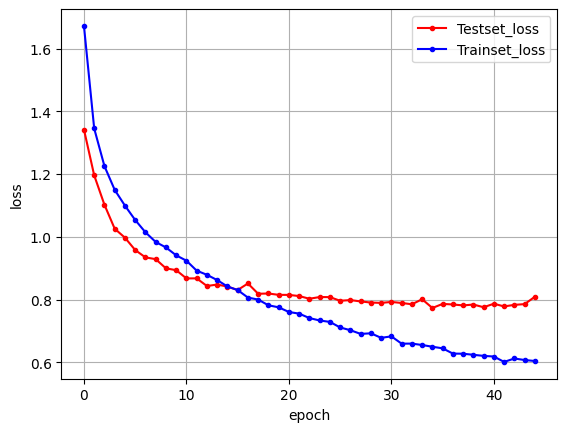

In [ ]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그리드, 레이블 추가
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증셋과 학습셋 정확도 그래프

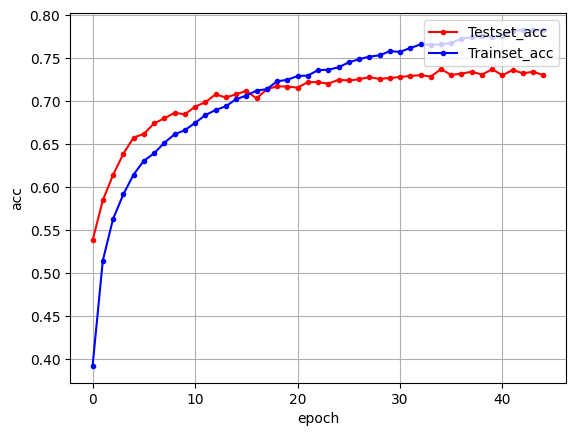

In [ ]:
# 검증셋과 학습셋의 정확도 저장
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

# 그래프 생성
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c="red", label='Testset_acc')
plt.plot(x_len, y_acc, marker='.', c="blue", label='Trainset_acc')

# 그리드, 레이블 추가
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# 예측

313/313 [==============================] - 2s 5ms/step


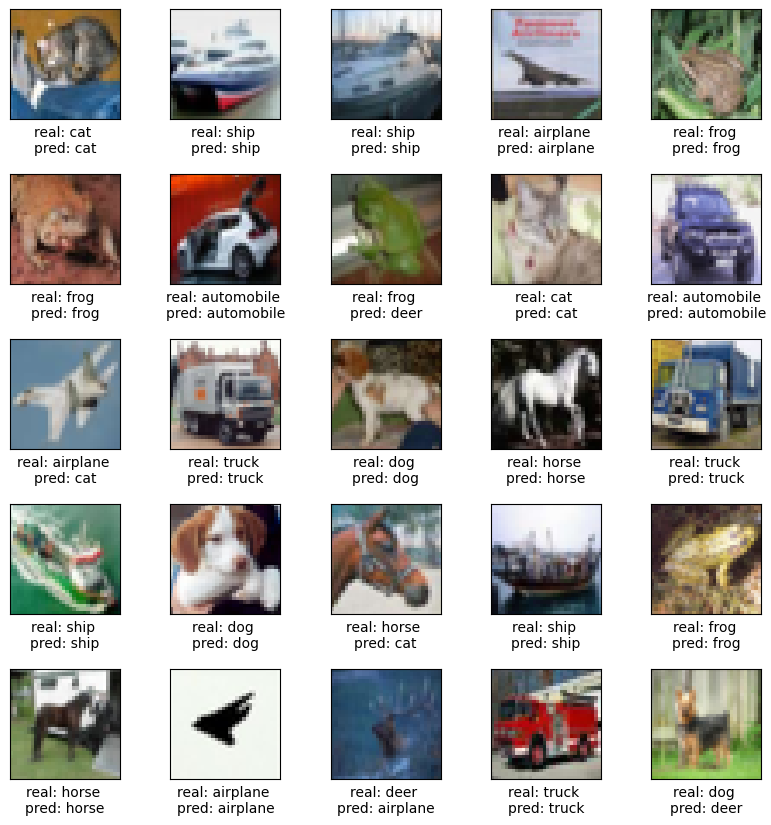

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

pred_labels = model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(25):
    real = np.argmax(test_labels[i])
    pred = np.argmax(pred_labels[i])
    plt.subplot(5,5,i+1)
    # 서브플롯 간의 간격 조절
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'real: {class_names[real]} \npred: {class_names[pred]}')
plt.show()